<!-- Updated Style with Custom Color Background -->
<div class="alert alert-block alert-warning" style="background-color: brown;color:white;">
    <h1><b><center>Healthcare Dataset</center></b></h1>
</div>

<div class="alert alert-block" style="background-color: lightgray; color: black;">

 - Understanding Data
 - Data Visualization
 - Data Preprocessing
 - Fitting and evaluating models
 - Choosing  and Improving the best Model
    
</div>


<div class="alert alert-block alert-danger">
  <h2 style="text-align:center; font-weight:bold;">1-  Importing Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,roc_auc_score,accuracy_score

<div class="alert alert-block alert-danger">
<h2><b><center>2- Dataset</center></b></h2>
</div>

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Import the Data</h3>


In [2]:
df = pd.read_csv("data9.csv")

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Display the First rows of the data</h3>


In [3]:
df.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


.head() shows us the first 20 rows (if no number is provided it gives you 5).

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Display the last rows of the data</h3>


In [4]:
df.tail(20).T

,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Name,Danielle Salinas,Catherine Carrillo,Danielle White,Mark Gross,Erica Crawford,Amanda Baker,Richard Mack,Bobby Pierce,Julie Johnson,Amy Lucas,Tracy Johnson,John Holder,Gabriel Rodriguez,Michael Munoz,Jorge Obrien,James Hood,Stephanie Evans,Christopher Martinez,Amanda Duke,Eric King
Age,71,54,78,74,72,72,18,84,60,47,35,56,37,39,69,83,47,54,84,20
Gender,Female,Male,Female,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male,Female,Male,Male,Male
Blood Type,A+,B-,B+,AB-,AB+,AB+,B+,O-,A-,B+,A+,A+,O+,O-,A+,A+,AB+,B-,A+,B-
Medical Condition,Cancer,Arthritis,Obesity,Obesity,Diabetes,Hypertension,Obesity,Obesity,Cancer,Arthritis,Arthritis,Asthma,Hypertension,Hypertension,Diabetes,Obesity,Arthritis,Arthritis,Arthritis,Arthritis
Date of Admission,2023-01-09,2021-08-23,2021-01-26,2022-01-22,2021-09-17,2019-09-14,2022-03-30,2022-04-18,2023-04-10,2020-07-23,2020-10-30,2022-06-03,2019-01-29,2023-10-09,2021-12-25,2022-07-29,2022-01-06,2022-07-01,2020-02-06,2023-03-22
Doctor,Brittney Curtis,Shawn Thompson,Sally Mitchell,Thomas Huber,Katie Huber,Martin Lopez,Jennifer Williams,Mario Gomez,Lindsay Mack,Jason Simmons,Paul Bell,James Schultz,James May,Stephen Evans,Frank Miller,Samuel Moody,Christopher Yates,Robert Nicholson,Jamie Lewis,Tasha Avila
Hospital,Brown LLC,"Dennis, Walker and Boyd","Dalton, Bernard and Daniel","Thompson, Flynn and Cooper",Ramirez PLC,Osborne PLC,"Harris, Fox and Brown",Sullivan Inc,Taylor-Pope,Alexander Inc,"Freeman, Nguyen and Ferguson","Peterson, Ali and Hall","Sutton, Andrews and Johnson",Moran Ltd,Scott LLC,"Wood, Martin and Simmons",Nash-Krueger,Larson and Sons,Wilson-Lyons,"Torres, Young and Stewart"
Insurance Provider,Medicare,UnitedHealthcare,Blue Cross,Medicare,Medicare,Cigna,Blue Cross,Cigna,UnitedHealthcare,UnitedHealthcare,Blue Cross,UnitedHealthcare,UnitedHealthcare,Cigna,UnitedHealthcare,UnitedHealthcare,Blue Cross,Blue Cross,UnitedHealthcare,Aetna
Billing Amount,47369.549977,46629.771749,35961.406697,1675.088639,37181.841257,27476.721751,15872.814148,27920.309416,6532.309645,36044.467488,48753.129033,14426.402162,8296.299322,12379.134624,16793.598395,39606.840083,5995.717488,49559.202905,25236.344761,37223.965865


<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Display the columns</h3>


In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

<div class="alert alert-block alert-danger">
<h2><b><center>3- Inspecting Dataframe Structure</center></b></h2>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Display the number of rows & columns</h3>

In [6]:
df.shape
print("Columns & Rows", df.shape)

Columns & Rows (10000, 15)


<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Generate the information of the data</h3>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

<h3 style="text-align:left; font-weight:bold; font-size:15px;">info() indicates that the dataset comprises 10,000 rows and 15 columns. Since each row corresponds to a patient, we have a total of 10,000 patients.</h3>

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Display the number of unique values in each column </h3>


In [8]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f"Number of unique values in column '{column}': {num_unique_values}")

Number of unique values in column 'Name': 9378
Number of unique values in column 'Age': 68
Number of unique values in column 'Gender': 2
Number of unique values in column 'Blood Type': 8
Number of unique values in column 'Medical Condition': 6
Number of unique values in column 'Date of Admission': 1815
Number of unique values in column 'Doctor': 9416
Number of unique values in column 'Hospital': 8639
Number of unique values in column 'Insurance Provider': 5
Number of unique values in column 'Billing Amount': 10000
Number of unique values in column 'Room Number': 400
Number of unique values in column 'Admission Type': 3
Number of unique values in column 'Discharge Date': 1834
Number of unique values in column 'Medication': 5
Number of unique values in column 'Test Results': 3


<h3 style="text-align:left; font-weight:bold; font-size:15px; color:red">There are repeated names !!! </h3>

In [9]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [10]:
value_counts = df['Blood Type'].value_counts()
print(value_counts)

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64


In [11]:
value_counts = df['Medical Condition'].value_counts()
print(value_counts)

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64


In [12]:
value_counts = df['Insurance Provider'].value_counts()
print(value_counts)

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64


In [13]:
value_counts = df['Admission Type'].value_counts()
print(value_counts)

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64


In [14]:
value_counts = df['Medication'].value_counts()
print(value_counts)

Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64


In [15]:
value_counts = df['Test Results'].value_counts()
print(value_counts)

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64


<h3 style="text-align:left; font-weight:bold; font-size:15px; color:green">The classes are relatively balanced</h3>

<!-- Updated Style with Custom Color Background -->
<div class="alert alert-block alert-warning" style="background-color: brown;color:white;">
    <h1><b><center>Data Visualization 📊</center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Numerical Features:</h3> 

In [16]:
df.describe(exclude=['O'])

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


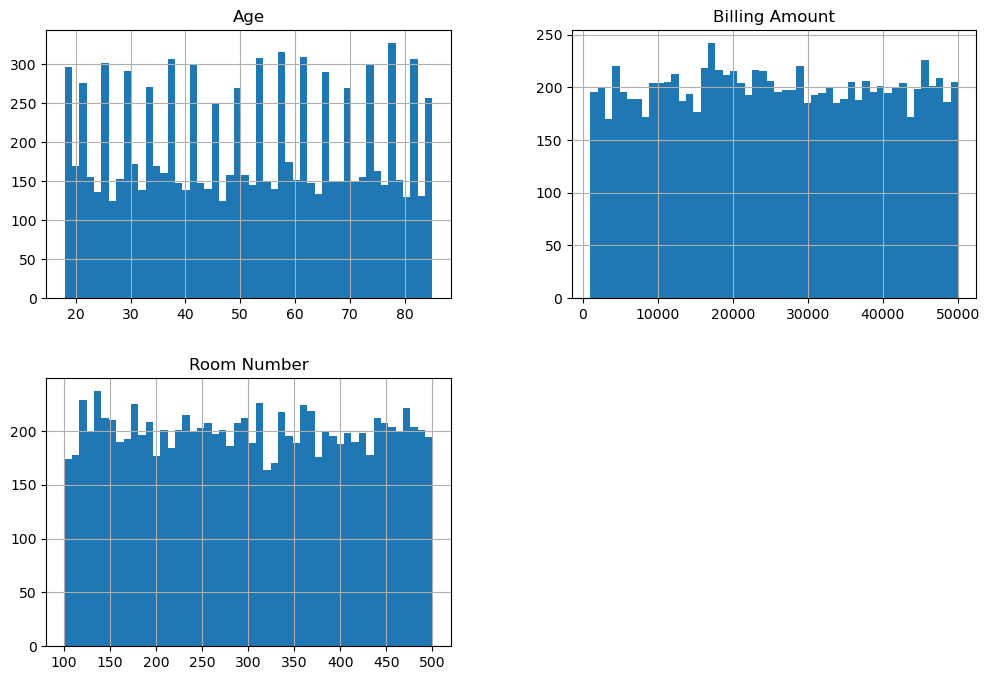

In [17]:
# Histogram

df.hist(bins=50, figsize=(12,8))
plt.show()

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Categorical features:</h3> 

In [18]:
df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [19]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']



C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


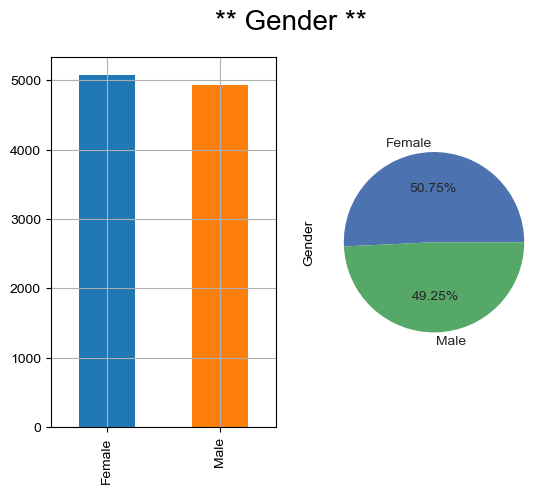

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


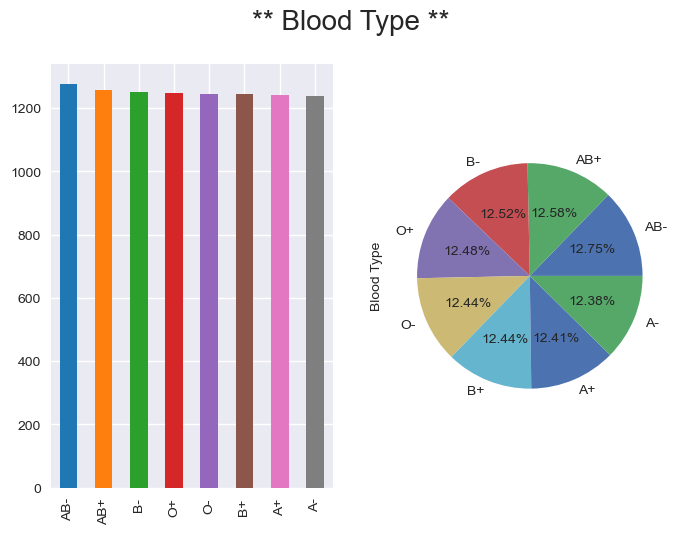

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


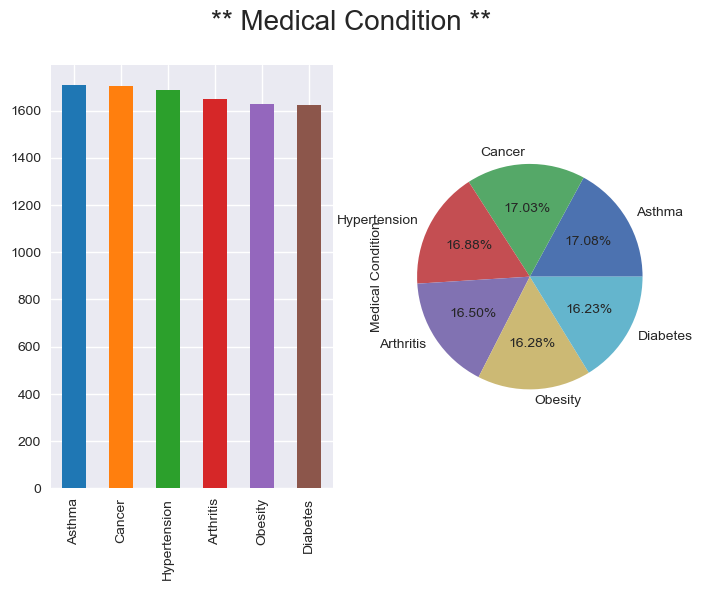

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


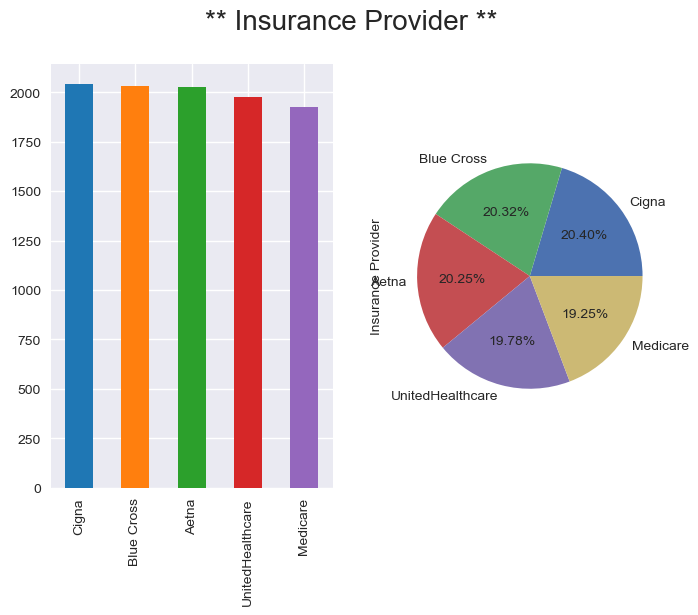

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


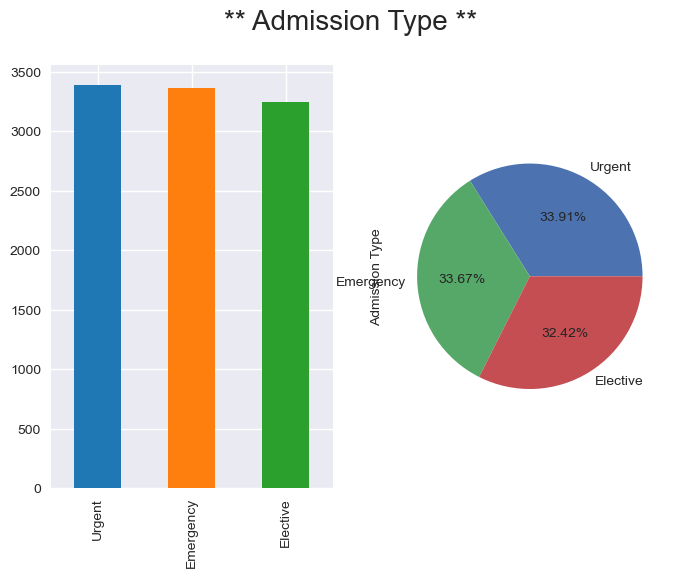

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


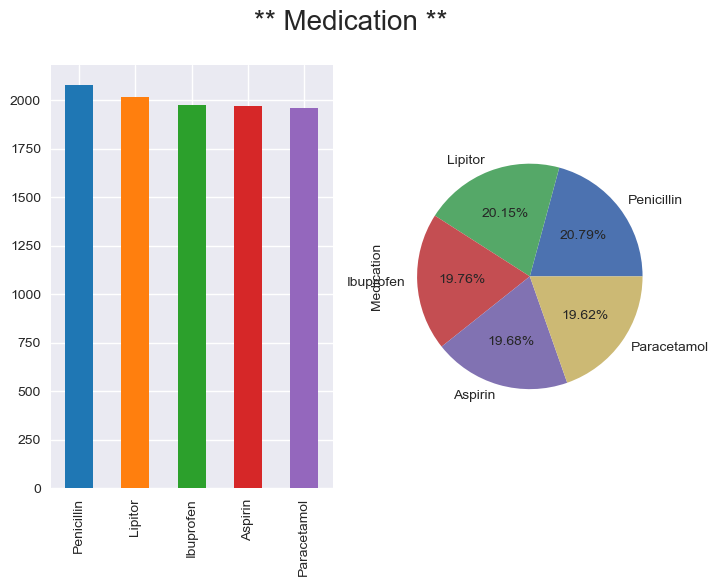

C:\Users\HP\AppData\Local\Temp\ipykernel_6200\1540478838.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


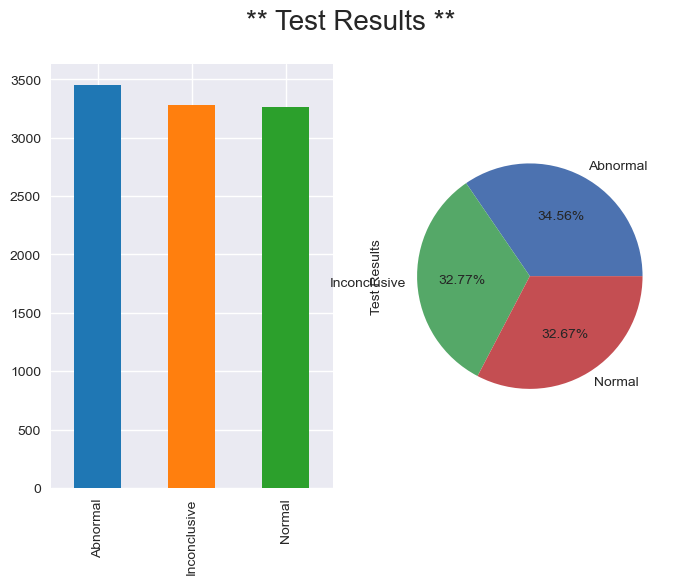

In [20]:
for i in cols:
    
    if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** Gender **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** ' + i + ' **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

<!-- Updated Style with Custom Color Background -->
<div class="alert alert-block alert-warning" style="background-color: brown;color:white;">
    <h1><b><center>Data Preprocessing</center></b></h1>
</div>

<div class="alert alert-block alert-danger">
<h2><b><center>1- cleaning data</center></b></h2>
</div>

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Check NaN value</h3>

In [21]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Checking for duplicates:</h3>

In [22]:
df.duplicated().sum()

0

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Calculate the duration in days between 'date_of_admission' and 'discharge_date',and then drop both columns from the dataset:</h3> 

In [23]:
df['date_of_admission'] = pd.to_datetime(df['Date of Admission'])
df['discharge_date'] = pd.to_datetime(df['Discharge Date'])

df['duration_days'] = (df['discharge_date'] - df['date_of_admission']).dt.days
df['duration_days'] = df['duration_days'].astype(int)

df = df.drop(columns = ['date_of_admission', 'discharge_date'], axis = 1)


<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Dropping unuseful Variables:</h3> 

In [24]:
df=df.drop(columns=['Room Number','Name','Doctor','Hospital','Date of Admission','Discharge Date'])

In [25]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,duration_days
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


<div class="alert alert-block alert-danger">
<h2><b><center>2- Handling categorical data</center></b></h2>
</div>

<h3 style="text-align:left; font-weight:bold; font-size:15px;">
When dealing with categorical data, different strategies are applied based on the nature of the information:<br>
    

- **Nominal data** (unordered): One can use techniques like *OneHotEncoder* to create binary columns for each category.
- **Ordinal data** (ordered): In cases where data has a specific order, *LabelEncoder* can be employed to assign integer values to categories.

In this context, we'll focus on encoding categorical features using one hot encoding.*.</h3>


In [26]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,duration_days
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal,20


In [27]:
data = df.drop(['Test Results'], axis=1)

num_columns = data.select_dtypes(include=np.number).columns

cat_columns= data.select_dtypes(include='object').columns

target='Test Results'


In [28]:
#from sklearn.preprocessing import LabelEncoder

In [29]:
cats_encoded=[]

for cat in cat_columns:
  df[cat]= df[cat].astype('category')
  df[cat+'_encoded'] = df[cat].cat.codes
  cats_encoded.append(cat+"_encoded")

df[cats_encoded].head(5)

,Gender_encoded,Blood Type_encoded,Medical Condition_encoded,Insurance Provider_encoded,Admission Type_encoded,Medication_encoded
0,0,7,3,3,0,0
1,1,6,1,4,1,2
2,1,5,5,3,1,2
3,1,5,1,3,2,4
4,1,7,0,4,2,3


In [30]:
one_hot_encoded_data = pd.get_dummies(df[cats_encoded], columns =cats_encoded)
one_hot_encoded_data.head(5)

,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,Blood Type_encoded_4,Blood Type_encoded_5,Blood Type_encoded_6,Blood Type_encoded_7,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
0,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [31]:
df[one_hot_encoded_data.columns]=one_hot_encoded_data.values
df=df.drop(columns=cat_columns)
df=df.drop(columns=cats_encoded)
df.head(5)

,Age,Billing Amount,Test Results,duration_days,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
0,81,37490.983364,Inconclusive,14,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,35,47304.064845,Normal,14,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,61,36874.896997,Normal,30,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,49,23303.322092,Abnormal,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,51,18086.344184,Normal,24,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [32]:
df["Test Results"]

0       Inconclusive
1             Normal
2             Normal
3           Abnormal
4             Normal
            ...     
9995        Abnormal
9996          Normal
9997          Normal
9998          Normal
9999        Abnormal
Name: Test Results, Length: 10000, dtype: object

<h3 style="text-align:left; font-weight:bold; font-size:15px;">Mapping the target</h3>


In [33]:
df[target].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

In [34]:
lkp_target = {"Abnormal":0, "Inconclusive": 1, "Normal":2}
df[target] = df[target].map(lkp_target)
df[target]

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int64

<div class="alert alert-block alert-danger">
<h2><b><center>3- check the relation between the target and the featuers</center></b></h2>
</div>

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">Check Corr</h3>

<h3 style="text-align:left; font-weight:bold; font-size:15px;">The correlation between all features </h3>

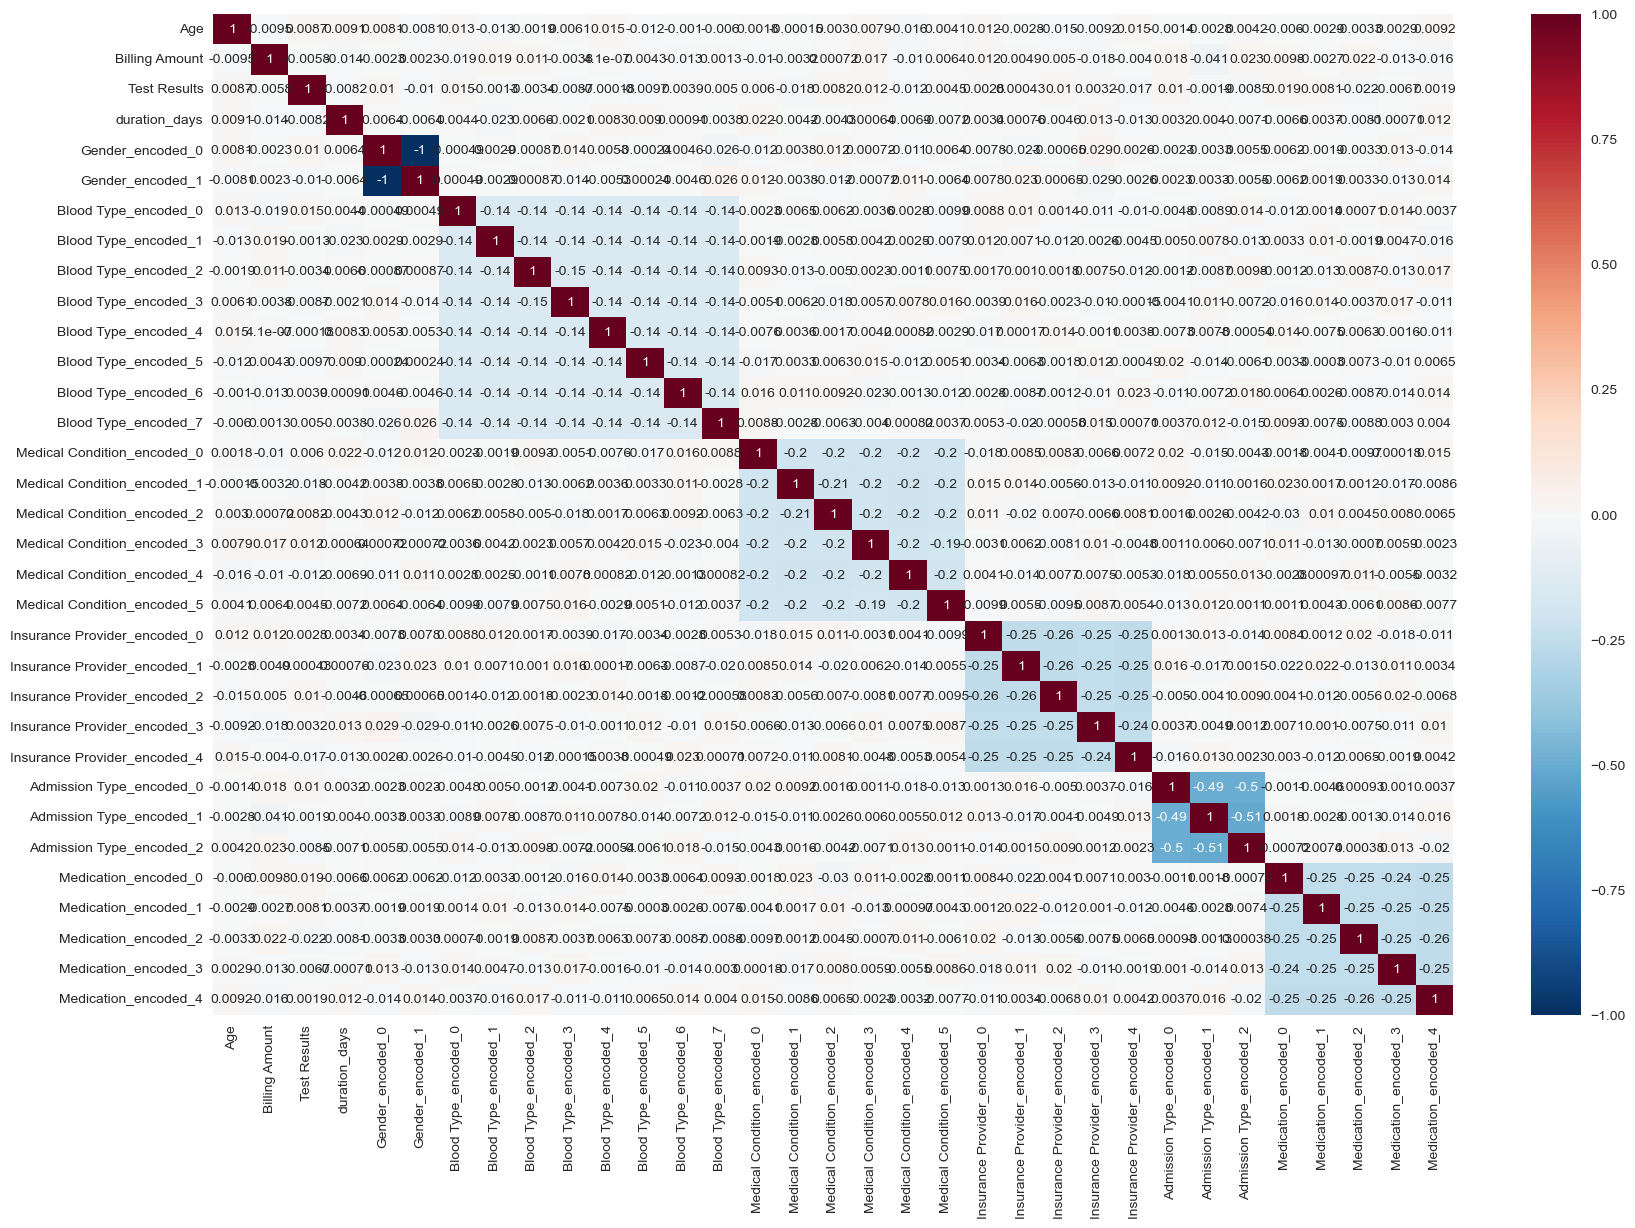

In [35]:
plt.figure(figsize=(20,13))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r',vmin=-1, vmax=1)
plt.show()

<h3 style="text-align:left; font-weight:bold; font-size:15px;">The correlation between features and the target variable</h3>

In [36]:
df.corr().iloc[[-2]]

,Age,Billing Amount,Test Results,duration_days,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
Medication_encoded_3,0.002851,-0.013044,-0.006733,-0.000709,0.013239,-0.013239,0.014142,0.004667,-0.012772,0.017248,...,-0.011295,-0.001949,0.001033,-0.014177,0.013131,-0.244555,-0.245173,-0.248185,1.0,-0.253112


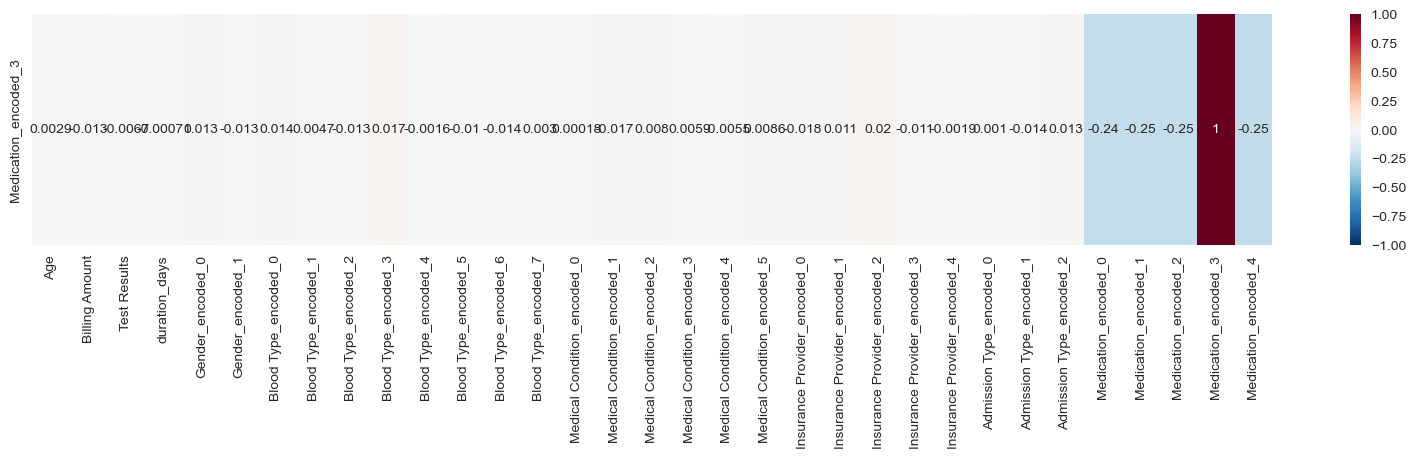

In [37]:
plt.figure(figsize=(20,3))
cor = df.corr().iloc[[-2]]
sns.heatmap(cor, annot=True, cmap='RdBu_r',vmin=-1, vmax=1)
plt.show()

<h3 style="text-align:left; font-weight:bold; font-size:15px; color:red">There is no strong relation between target and features!!!</h3>

<div class="alert alert-block alert-warning" style="background-color: brown;color:white;">
    <h1><b><center>Fitting models</center></b></h1>
</div>


<div class="alert alert-block" style="background-color: lightgray; color: black;">
Workflow Steps : 
    
- Selections Columns To Train
- Splitting the data into a test set and a training set
- scaling of data
- Model 1 : Logistic Regression
    - Fit the data(with/without scaled data)
        with scaled data
    - Evaluate the model
- Model 2 : Decision Tree
    - Fit the data(with/without scaled data)
    - Evaluate the model
- Model 3 : Random Forest
    - Fit the data(Scaling is not done in Random forest)
    - Evaluate the model
- Model 4 : Naive Base 
    - Fit the data(with/without scaled data)
    - Evaluate the model
- Model 5 : k-Nearest Neighbors (KNN) 
    - Fit the data(with/without scaled data)
    - Evaluate the model 
- Model 6: XGBoost (Extreme Gradient Boosting) 
    - Fit the data(with/without scaled data)
    - Evaluate the model
</div>


<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Selections Columns To Train
</h3>

In [38]:
#'y' is the target column
X = df.drop('Test Results', axis=1)
y = df['Test Results']

In [39]:
X

,Age,Billing Amount,duration_days,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,Blood Type_encoded_4,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
0,81,37490.983364,14,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,35,47304.064845,14,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,61,36874.896997,30,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,49,23303.322092,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,51,18086.344184,24,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,39606.840083,4,0,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
9996,47,5995.717488,23,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
9997,54,49559.202905,14,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9998,84,25236.344761,20,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [40]:
y

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int64

<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Splitting the data into a test set and a training set
</h3>

In [41]:
#from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 32) (8000, 32) (2000, 32)


<!-- Updated Subtitle Style -->
<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
scaling of data
</h3>

In [43]:
#from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center>Model 1 : Logistic Regression</center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [44]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score



logreg = LogisticRegression(random_state=42)


<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h3>

In [45]:
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
With Scaled Data
</h3>

In [46]:
logreg.fit(X_train_scaled, y_train)
y_pred_train_scaled = logreg.predict(X_train_scaled)
y_pred_test_scaled = logreg.predict(X_test_scaled)

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [47]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Evaluate the model with scaled data
accuracy_train_scaled = accuracy_score(y_train, y_pred_train_scaled)
accuracy_test_scaled = accuracy_score(y_test, y_pred_test_scaled)

In [48]:
print("Logistic Regression without Scaled Data")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print()


print("Logistic Regression with Scaled Data")
print(f"Train Accuracy: {accuracy_train_scaled:.4f}")
print(f"Test Accuracy: {accuracy_test_scaled:.4f}")
print()

Logistic Regression without Scaled Data
Train Accuracy: 0.3438
Test Accuracy: 0.3530

Logistic Regression with Scaled Data
Train Accuracy: 0.3658
Test Accuracy: 0.3325



<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center> Model 2: Decision Tree</center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [49]:
#from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

<h4 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h4>

In [50]:
dt_classifier.fit(X_train, y_train)
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
With Scaled Data
</h3>

In [51]:
dt_classifier.fit(X_train_scaled, y_train)
y_pred_train_dt_scaled = dt_classifier.predict(X_train_scaled)
y_pred_test_dt_scaled = dt_classifier.predict(X_test_scaled)

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [52]:
# Evaluate the model
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)



# Evaluate the model with scaled data
accuracy_train_dt_scaled = accuracy_score(y_train, y_pred_train_dt_scaled)
accuracy_test_dt_scaled = accuracy_score(y_test, y_pred_test_dt_scaled)

In [53]:
print("Decision Tree without Normal Data")
print(f"Train Accuracy: {accuracy_train_dt:.4f}")
print(f"Test Accuracy: {accuracy_test_dt:.4f}")
print()

print("Decision Tree with Scaled Data")
print(f"Train Accuracy: {accuracy_train_dt_scaled:.4f}")
print(f"Test Accuracy: {accuracy_test_dt_scaled:.4f}")
print()

Decision Tree without Normal Data
Train Accuracy: 1.0000
Test Accuracy: 0.3275

Decision Tree with Scaled Data
Train Accuracy: 1.0000
Test Accuracy: 0.3270



<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center> Model 3: Random Forest</center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [54]:
#from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h3>

In [55]:
rf_classifier.fit(X_train, y_train)
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Scaling is not necessary for Random Forest models.
</h3>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [56]:
# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

In [57]:
print("Random Forest with Normalized Data")
print(f"Train Accuracy: {accuracy_train_rf:.4f}")
print(f"Test Accuracy: {accuracy_test_rf:.4f}")
print()

Random Forest with Normalized Data
Train Accuracy: 1.0000
Test Accuracy: 0.3355



<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center> Model 4: Naive Base </center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [58]:
#from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h3>

In [59]:
nb_classifier.fit(X_train, y_train)
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
With Scaled Data
</h3>

In [60]:
nb_classifier.fit(X_train_scaled, y_train)
y_pred_train_nb_scaled = nb_classifier.predict(X_train_scaled)
y_pred_test_nb_scaled = nb_classifier.predict(X_test_scaled)

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [61]:
# Evaluate the model
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)


# Evaluate the model with scaled data
accuracy_train_nb_scaled = accuracy_score(y_train, y_pred_train_nb_scaled)
accuracy_test_nb_scaled = accuracy_score(y_test, y_pred_test_nb_scaled)

In [62]:
print("Gaussian Naive Bayes with Normalized Data")
print(f"Train Accuracy: {accuracy_train_nb:.4f}")
print(f"Test Accuracy: {accuracy_test_nb:.4f}")
print()


print("Gaussian Naive Bayes with Scaled Data")
print(f"Train Accuracy: {accuracy_train_nb_scaled:.4f}")
print(f"Test Accuracy: {accuracy_test_nb_scaled:.4f}")
print()

Gaussian Naive Bayes with Normalized Data
Train Accuracy: 0.3659
Test Accuracy: 0.3360

Gaussian Naive Bayes with Scaled Data
Train Accuracy: 0.3583
Test Accuracy: 0.3370



<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center> Model 5: k-Nearest Neighbors (KNN) </center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [63]:
#from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier()

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h3>

In [64]:
knn_classifier.fit(X_train, y_train)
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
With Scaled Data
</h3>

In [65]:
knn_classifier.fit(X_train_scaled, y_train)
y_pred_train_knn_scaled = knn_classifier.predict(X_train_scaled)
y_pred_test_knn_scaled = knn_classifier.predict(X_test_scaled)

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [66]:
# Evaluate the model
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)


# Evaluate the model with scaled data
accuracy_train_knn_scaled = accuracy_score(y_train, y_pred_train_knn_scaled)
accuracy_test_knn_scaled = accuracy_score(y_test, y_pred_test_knn_scaled)

In [67]:
print("k-Nearest Neighbors without scaled Data")
print(f"Train Accuracy: {accuracy_train_knn:.4f}")
print(f"Test Accuracy: {accuracy_test_knn:.4f}")
print()


print("k-Nearest Neighbors with Scaled Data")
print(f"Train Accuracy: {accuracy_train_knn_scaled:.4f}")
print(f"Test Accuracy: {accuracy_test_knn_scaled:.4f}")
print()

k-Nearest Neighbors without scaled Data
Train Accuracy: 0.5513
Test Accuracy: 0.3315

k-Nearest Neighbors with Scaled Data
Train Accuracy: 0.5597
Test Accuracy: 0.3375



<div class="alert alert-block alert-warning" style="background-color: gray;color:white;">
    <h1><b><center> Model 6: XGBoost (Extreme Gradient Boosting) </center></b></h1>
</div>

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Fitting model
</h3>

In [68]:
#from xgboost import XGBClassifier


xgb_classifier = XGBClassifier()

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
Without Scaled Data
</h3>

In [69]:
xgb_classifier.fit(X_train, y_train)
y_pred_train_xgb = xgb_classifier.predict(X_train)
y_pred_test_xgb = xgb_classifier.predict(X_test)

<h3 style="text-align:left; font-weight:bold; color:black; font-size:18px;">
With Scaled Data
</h3>

In [70]:
xgb_classifier.fit(X_train_scaled, y_train)
y_pred_train_xgb_scaled = xgb_classifier.predict(X_train_scaled)
y_pred_test_xgb_scaled = xgb_classifier.predict(X_test_scaled)

<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Evaluate the model
</h3>

In [71]:
# Evaluate the model
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)


# Evaluate the model with scaled data
accuracy_train_xgb_scaled = accuracy_score(y_train, y_pred_train_xgb_scaled)
accuracy_test_xgb_scaled = accuracy_score(y_test, y_pred_test_xgb_scaled)

In [72]:
print("MXGBoost wihout scaled Data")
print(f"Train Accuracy: {accuracy_train_xgb:.4f}")
print(f"Test Accuracy: {accuracy_test_xgb:.4f}")
print()


print("XGBoost with Scaled Data")
print(f"Train Accuracy: {accuracy_train_xgb_scaled:.4f}")
print(f"Test Accuracy: {accuracy_test_xgb_scaled:.4f}")
print()

MXGBoost wihout scaled Data
Train Accuracy: 0.8968
Test Accuracy: 0.3505

XGBoost with Scaled Data
Train Accuracy: 0.8968
Test Accuracy: 0.3505



<h3 style="text-align:left; font-weight:bold; font-size:15px; color:green">The best  model is XGBoost with an accuracy of 0.3505 </h3>

<div class="alert alert-block alert-warning" style="background-color: brown;color:white;">
    <h1><b><center>Improving the Model with the Best Result</center></b></h1>
</div>


<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Apply the hyperparameter tuning.
</h3>

In [73]:
#from sklearn.impute import SimpleImputer

#from sklearn.metrics import mean_absolute_error
#import xgboost as xgb

#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#%matplotlib inline

#from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,roc_auc_score,accuracy_score

def objective(trial, x=X, y=y, test_size=0.2, random_state=42, num_round=100):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]


    params = {
        'objective': 'multi:softprob',
        'num_class': 3,
        'tree_method':'hist',
        'lambda': trial.suggest_float('lambda', 2, 4),
        'learning_rate': 0.01,
        'colsample_bytree': 1.0,
        'subsample':1.0,
        'max_depth': trial.suggest_categorical('max_depth', [1,2,3]),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [1,2,3]),
        'eval_metric':"auc"
    }

    num_round = 20000

    bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round,
                    evals=watchlist, verbose_eval=200, early_stopping_rounds=100)
    
    yhat = bst.predict(dtest)
    preds = yhat.argmax(axis=1)
    accuracy = accuracy_score(y_test, preds)*100
    print('accurecy :', str(accuracy))
    

    
    auc_test = roc_auc_score(y_test, yhat, average='macro', multi_class='ovr')

    return auc_test

In [74]:
!pip install optuna
import optuna

In [75]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-12-31 00:36:09,465] A new study created in memory with name: no-name-30273d16-9261-4037-9360-2d0ddaaeed3e


[0]	train-auc:0.52831	eval-auc:0.49947
[133]	train-auc:0.55215	eval-auc:0.49575


[I 2023-12-31 00:36:09,820] Trial 0 finished with value: 0.4954827843640394 and parameters: {'lambda': 3.8068635994644477, 'max_depth': 2, 'min_child_weight': 1}. Best is trial 0 with value: 0.4954827843640394.


accurecy : 34.8
[0]	train-auc:0.53890	eval-auc:0.50178
[126]	train-auc:0.57642	eval-auc:0.49814


[I 2023-12-31 00:36:10,216] Trial 1 finished with value: 0.4980360111410908 and parameters: {'lambda': 2.9847315234886898, 'max_depth': 3, 'min_child_weight': 2}. Best is trial 1 with value: 0.4980360111410908.


accurecy : 35.0
[0]	train-auc:0.51341	eval-auc:0.49515
[151]	train-auc:0.52709	eval-auc:0.50008


[I 2023-12-31 00:36:10,581] Trial 2 finished with value: 0.4999798441834626 and parameters: {'lambda': 3.295466961458108, 'max_depth': 1, 'min_child_weight': 2}. Best is trial 2 with value: 0.4999798441834626.


accurecy : 34.35
[0]	train-auc:0.52831	eval-auc:0.49947
[134]	train-auc:0.55251	eval-auc:0.49589


[I 2023-12-31 00:36:10,957] Trial 3 finished with value: 0.4957129377819071 and parameters: {'lambda': 3.413425346692977, 'max_depth': 2, 'min_child_weight': 1}. Best is trial 2 with value: 0.4999798441834626.


accurecy : 34.949999999999996
[0]	train-auc:0.53922	eval-auc:0.50177
[126]	train-auc:0.57710	eval-auc:0.49751


[I 2023-12-31 00:36:11,344] Trial 4 finished with value: 0.4973280699002853 and parameters: {'lambda': 2.6192505959226047, 'max_depth': 3, 'min_child_weight': 1}. Best is trial 2 with value: 0.4999798441834626.


accurecy : 35.15
[0]	train-auc:0.51341	eval-auc:0.49515
[151]	train-auc:0.52752	eval-auc:0.50051


[I 2023-12-31 00:36:11,693] Trial 5 finished with value: 0.500421560098959 and parameters: {'lambda': 2.0279655020987137, 'max_depth': 1, 'min_child_weight': 1}. Best is trial 5 with value: 0.500421560098959.


accurecy : 34.35
[0]	train-auc:0.52831	eval-auc:0.49947
[160]	train-auc:0.55516	eval-auc:0.49484


[I 2023-12-31 00:36:12,119] Trial 6 finished with value: 0.49464229297172385 and parameters: {'lambda': 3.0259138842733417, 'max_depth': 2, 'min_child_weight': 2}. Best is trial 5 with value: 0.500421560098959.


accurecy : 34.8
[0]	train-auc:0.51341	eval-auc:0.49515
[150]	train-auc:0.52720	eval-auc:0.50010


[I 2023-12-31 00:36:12,453] Trial 7 finished with value: 0.5000693694574642 and parameters: {'lambda': 2.4811622504545756, 'max_depth': 1, 'min_child_weight': 1}. Best is trial 5 with value: 0.500421560098959.


accurecy : 34.35
[0]	train-auc:0.52831	eval-auc:0.49947
[134]	train-auc:0.55231	eval-auc:0.49569


[I 2023-12-31 00:36:12,793] Trial 8 finished with value: 0.495525740562885 and parameters: {'lambda': 3.9445480405091002, 'max_depth': 2, 'min_child_weight': 3}. Best is trial 5 with value: 0.500421560098959.


accurecy : 34.8
[0]	train-auc:0.51341	eval-auc:0.49515
[151]	train-auc:0.52712	eval-auc:0.50009


[I 2023-12-31 00:36:13,136] Trial 9 finished with value: 0.4999896452532115 and parameters: {'lambda': 3.6643320274214535, 'max_depth': 1, 'min_child_weight': 3}. Best is trial 5 with value: 0.500421560098959.


accurecy : 34.35


<h3 style="text-align:left; font-weight:bold; font-size:15px; color:green">The best result was 35% on trail 3 lets TRAIN !</h3>

<h3 style="text-align:left; font-weight:bold; font-size:15px;">{'lambda': 2.729742558851534, 'max_depth': 2, 'min_child_weight': 3}</h3>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'tree_method':'hist',
    'lambda': 2.729742558851534,
    'learning_rate': 0.01,
    'colsample_bytree': 1.0,
    'subsample':1.0,
    'max_depth': 2,
    'min_child_weight': 3,
    'eval_metric':"auc"
}
num_round = 20000
bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round,
                evals=watchlist, verbose_eval=200, early_stopping_rounds=100)

[0]	train-auc:0.52831	eval-auc:0.49947
[132]	train-auc:0.55170	eval-auc:0.49571


accurecy : 35.15


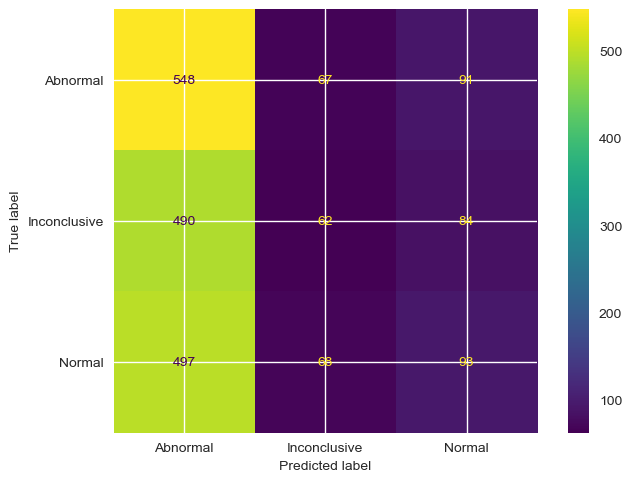

In [77]:
yhat = bst.predict(dtest)
preds = yhat.argmax(axis=1)

accuracy = accuracy_score(y_test, preds)*100
print('accurecy :', str(accuracy))
cm = confusion_matrix(y_test, preds, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Abnormal', "Inconclusive", "Normal"])
disp.plot()

In [78]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.36      0.78      0.49       706
           1       0.31      0.10      0.15       636
           2       0.35      0.14      0.20       658

    accuracy                           0.35      2000
   macro avg       0.34      0.34      0.28      2000
weighted avg       0.34      0.35      0.29      2000



<h3 style="text-align:left; font-weight:bold; color:brown; font-size:18px;">
Testing
</h3>

<h3 style="text-align:left; font-weight:bold; font-size:15px;">Visualizing the actual Test Results and predicted Test Results</h3>

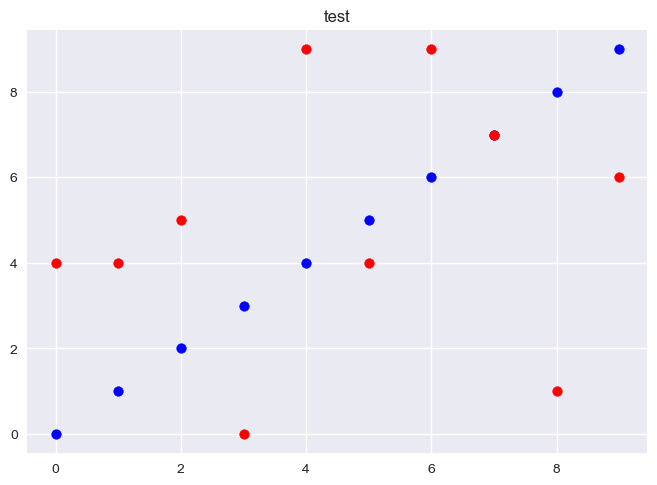

In [79]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred_test_xgb,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")